In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import altair as alt

from PIL import Image

In [2]:
df_ndcg = pd.read_csv('../resources/eval/ndcg.csv')

In [3]:
# preppare data for showing the Top Ranking Method 
df_ndcg_avg = df_ndcg.groupby(by=['Query ID', 'Ranking Method']).mean().reset_index()
df_ndcg_avg_melt = df_ndcg_avg.melt(id_vars=['Query ID', 'Ranking Method'])
df_ndcg_avg_melt = df_ndcg_avg_melt.sort_values(['Query ID', 'value'], ascending=[True, False])
df_ndcg_avg_melt = df_ndcg_avg_melt.groupby(by=['Query ID', 'variable']).first().reset_index()
df_ndcg_avg_melt.head(5)

,Query ID,variable,Ranking Method,value
0,Q1,NDCG@10,Discounted Reward Only,0.951410
1,Q1,NDCG@3,Discounted Reward Only,0.880234
2,Q1,NDCG@5,Discounted Reward Only,0.852802
3,Q2,NDCG@10,Average,0.949599
4,Q2,NDCG@3,Average,0.851194


In [4]:
# prepare data for bar chart with error bars
df_ndcg_melt = df_ndcg.melt(id_vars=['Query ID', 'Ranking Method', 'User ID'])
df_ndcg_melt.head(5)


,Query ID,Ranking Method,User ID,variable,value
0,Q1,Average,U1,NDCG@10,0.917250
1,Q1,Discounted Reward Only,U1,NDCG@10,0.959709
2,Q1,Discounted Reward with Adjustment,U1,NDCG@10,0.929303
3,Q2,Average,U1,NDCG@10,0.981928
4,Q2,Discounted Reward Only,U1,NDCG@10,0.909765


In [14]:
domain = ['Average', 'Discounted Reward Only', 'Discounted Reward with Adjustment']
range_ = ['#20a4d0', '#f4b036', '#9cc989']

rect_chart = alt.Chart(data=df_ndcg_avg_melt).mark_rect(opacity=0.7, stroke='black', strokeWidth=1).encode(
    y=alt.Y('Query ID:O'),
    x=alt.X('variable:N', title='NDCG', sort=['NDCG@3', 'NDCG@5', 'NDCG@10']),
    color=alt.Color('Ranking Method:N').scale(domain=domain, range=range_)
).properties(
    width=100,
    height=300,
    title='Top Ranking Method per Query'
)

bar_chart = alt.Chart(data=df_ndcg_melt).mark_bar(opacity=0.9, clip=True).encode(
    x=alt.X('variable:N', title='NDCG', sort=['NDCG@3', 'NDCG@5', 'NDCG@10']),
    y=alt.Y('mean(value):Q').scale(domain=(0.5,1)),
    color=alt.Color('Ranking Method:N').scale(domain=domain, range=range_),
    xOffset='Ranking Method:N',
)

error_bars = alt.Chart(data=df_ndcg_melt).mark_errorbar(extent='ci').encode(
    x=alt.X('variable:N', title='NDCG', sort=['NDCG@3', 'NDCG@5', 'NDCG@10']),
    y=alt.Y('value:Q').scale(domain=(0.5,1)),
    xOffset='Ranking Method:N'
)

bar_chart_with_error = (bar_chart + error_bars).properties(
    width=400,
    height=300,
    title='Mean NDCG across Ranking Methods'
)

eval_analysis_chart = alt.hconcat(bar_chart_with_error, rect_chart)

eval_analysis_chart


alt.HConcatChart(...)

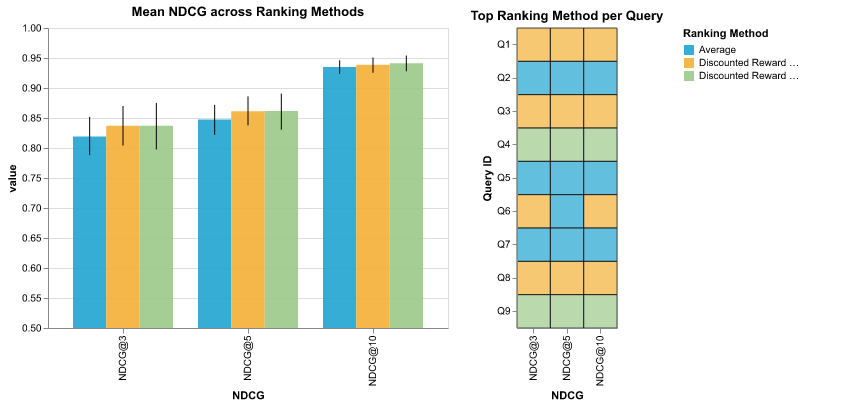

In [15]:
# Uncomment below line to save a new version of the vis
#eval_analysis_chart.save('../resources/img/eval_analysis_chart.png')
Image.open('../resources/img/eval_analysis_chart.png')

In [16]:
domain = ['Average', 'Discounted Reward Only', 'Discounted Reward with Adjustment']
range_ = ['#20a4d0', '#f4b036', '#9cc989']

chart_3 = alt.Chart(data=df_ndcg_avg).mark_bar(opacity=1, clip=True).encode(
    y=alt.Y('Query ID:O'),
    x=alt.X('NDCG@3:Q').scale(domain=(0.5,1)),
    color=alt.Color('Ranking Method:N').scale(domain=domain, range=range_),
    yOffset='Ranking Method:N',
    text=alt.Text('NDCG@3:Q', format=',.2f')
).properties(
    width=180,
    height=500,
)

chart_3_text = chart_3 + chart_3.mark_text(align='left', dx=2)

chart_5 = alt.Chart(data=df_ndcg_avg).mark_bar(opacity=1, clip=True).encode(
    y=alt.Y('Query ID:O', title=''),
    x=alt.X('NDCG@5:Q').scale(domain=(0.5,1)),
    color=alt.Color('Ranking Method:N').scale(domain=domain, range=range_),
    yOffset='Ranking Method:N',
    text=alt.Text('NDCG@5:Q', format=',.2f')
).properties(
    width=180,
    height=500,
)

chart_5_text = chart_5 + chart_5.mark_text(align='left', dx=2)

chart_10 = alt.Chart(data=df_ndcg_avg).mark_bar(opacity=1, clip=True).encode(
    y=alt.Y('Query ID:O', title=''),
    x=alt.X('NDCG@10:Q').scale(domain=(0.5,1)),
    color=alt.Color('Ranking Method:N').scale(domain=domain, range=range_),
    yOffset='Ranking Method:N',
    text=alt.Text('NDCG@10:Q', format=',.2f')
).properties(
    width=180,
    height=500
)

chart_10_text = chart_10 + chart_10.mark_text(align='left', dx=2)

ndcg_summary_chart = alt.hconcat(chart_3_text, chart_5_text, chart_10_text, title=alt.Title(text='NDCG Score for all Queries', anchor='middle'))
ndcg_summary_chart

alt.HConcatChart(...)

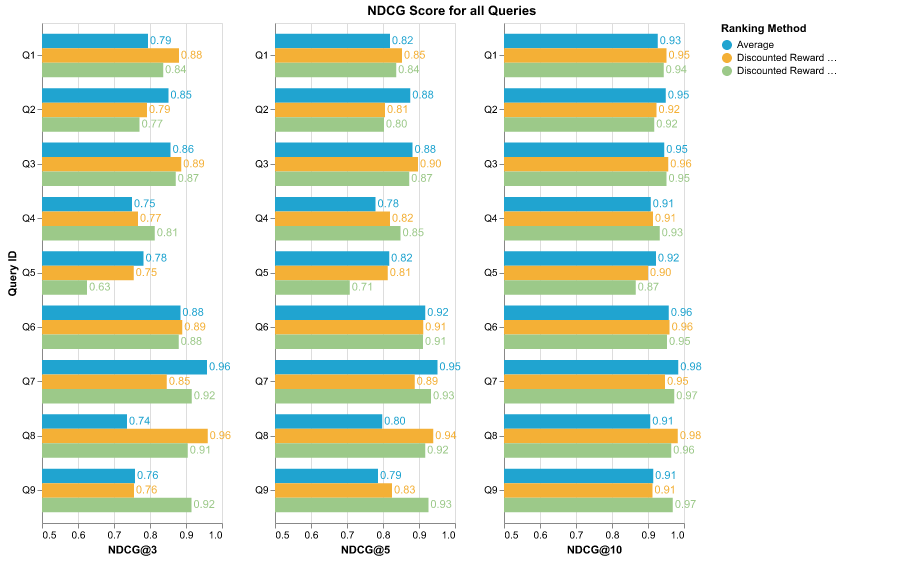

In [17]:
# Uncomment below line to save a new version of the vis
ndcg_summary_chart.save('../resources/img/ndcg_summary_chart.png')
Image.open('../resources/img/ndcg_summary_chart.png')